In [11]:
import numpy as np
import tensorflow as tf

In [12]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

data_size = x_train.shape[0]
batch_size = 12

selected = np.random.choice(data_size, batch_size)

print(selected)

x_batch = x_train[selected]
y_batch = y_train[selected]

[58047 56660 49808 25110 15078 58563 10737 38162 27252 21470  8920 19518]


In [13]:
import numpy as np

def actf(x):
  return 1/(1+np.exp(-x))

def actf_deriv(x):
  return x*(1-x)

inputs, hiddens, outputs = 2,2,1
learning_rate = 0.5


X = np.array([[0,0],[0,1],[1,0],[1,1]])
T = np.array([[0],[1],[1],[0]])

W1 = 2*np.random.random((inputs, hiddens)) -1
W2 = 2*np.random.random((hiddens, outputs)) -1

B1 = np.zeros(hiddens)
B2 = np.zeros(outputs)

def predict(x):
  layer0 = x
  Z1 = np.dot(layer0, W1)+B1
  layer1 = actf(Z1)
  Z2 = np.dot(layer1, W2)+B2
  layer2 = actf(Z2)             #Activation Function
  return layer0, layer1, layer2

def fit(): #Reverse
  global W1, W2, B1, B2
  for i in range(60000):
    layer0, layer1, layer2 = predict(X)
    layer2_error = layer2-T
    layer2_delta = layer2_error*actf_deriv(layer2)
    layer1_error = np.dot(layer2_delta, W2.T)
    layer1_delta = layer1_error*actf_deriv(layer1)

    W2 += -learning_rate*np.dot(layer1.T, layer2_delta)/4.0
    W1 += -learning_rate*np.dot(layer0.T, layer1_delta)/4.0
    B2 += -learning_rate*np.sum(layer2_delta, axis=0)/4.0
    B1 += -learning_rate*np.sum(layer1_delta, axis=0)/4.0

def test():
  for x, y in zip(X, T):
    x = np.reshape(x, (1, -1))
    layer0, layer1, layer2 = predict(x)
    print(x, y, layer2)


fit()
test()



[[0 0]] [0] [[0.01485672]]
[[0 1]] [1] [[0.98722762]]
[[1 0]] [1] [[0.98707946]]
[[1 1]] [0] [[0.01345636]]


In [14]:
import matplotlib.pyplot as plt
import tensorflow as tf


(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()


In [15]:
train_images.shape

(60000, 28, 28)

In [16]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

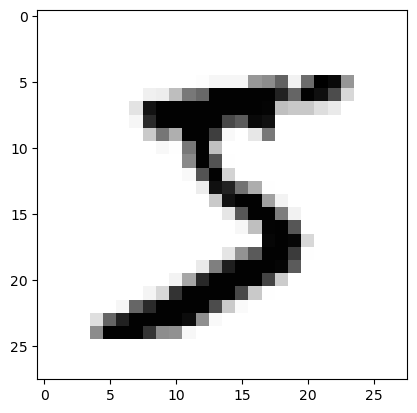

In [17]:
plt.imshow(train_images[0], cmap="Greys")

In [18]:
model = tf.keras.models.Sequential()


model.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(784,)))
model.add(tf.keras.layers.Dense(10, activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='mse', metrics=['accuracy']) #Define Optimizer, Loss_Function, Metrics


#Data Pre-Set
train_images = train_images.reshape((60000, 784))
train_images = train_images.astype('float32') / 255.0

test_images = test_images.reshape((10000, 784))
test_images = test_images.astype('float32') / 255.0

#Redefine Lables
#OneHotEncoding
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

model.fit(train_images, train_labels, epochs=5, batch_size=128)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('테스트 정확도:', test_acc)



Epoch 1/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0159 - accuracy: 0.9151
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0062 - accuracy: 0.9664
Epoch 3/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0044 - accuracy: 0.9771
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0033 - accuracy: 0.9833
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.0036 - accuracy: 0.9810
테스트 정확도: 0.9810000061988831


Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0023 - accuracy: 0.9887
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0019 - accuracy: 0.9905
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0016 - accuracy: 0.9920
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0014 - accuracy: 0.9929
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0012 - accuracy: 0.9939


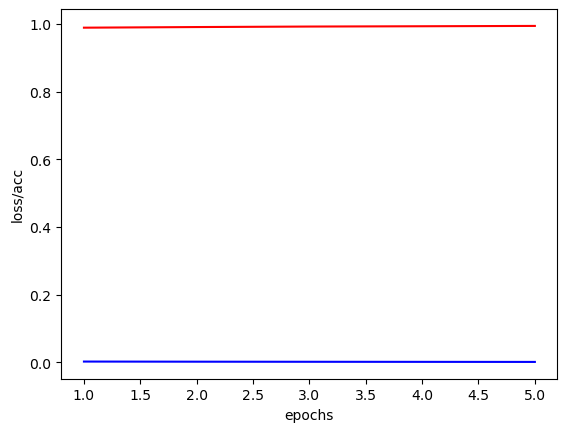

In [19]:
history = model.fit(train_images, train_labels, epochs=5, batch_size=128)
loss = history.history['loss']
acc = history.history['accuracy']
epochs = range(1, len(loss)+1)


plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, acc, 'r', label='Accuracy')
plt.xlabel('epochs')
plt.ylabel('loss/acc')
plt.show()

In [20]:
import cv2 as cv

image = cv.imread('test.png', cv.IMREAD_GRAYSCALE)
image = cv.resize(image, (28, 28))
image = image.astype('float32')
image = image.reshape(1, 784)
image = 255-image
image /= 255.0

plt.imshow(image.reshape(28, 28),cmap='Greys')
plt.show()

[ WARN:0@0.012] global loadsave.cpp:241 findDecoder imread_('test.png'): can't open/read file: check file path/integrity


error: OpenCV(4.10.0) /Users/xperience/GHA-Actions-OpenCV/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In [ ]:
pred = model.predict(image.reshape(1, 784), batch_size=1)
print("추정된 숫자=", pred.argmax())

AttributeError: 'NoneType' object has no attribute 'reshape'

In [ ]:
!pip install scikeras

import numpy as np
import matplotlib as plt
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

# Prepareing Datasets
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

# Build Neuro-Network
def build_model():
  network = tf.keras.models.Sequential()
  network = tf.keras.models.Sequential()
  network.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
  network.add(tf.keras.layers.Dense(10, activation='sigmoid'))

  network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
  return network

param_grid = { 'epochs':[1, 2, 3], 'batch_size':[32, 64] }  #Ephoch : 1,2,3 Batch : 32, 64

# Repack Keras Model to sklearn library
model = KerasClassifier(build_fn = build_model, verbose=1)

# Grid Search
gs = GridSearchCV( estimator=model, param_grid=param_grid, cv=3, n_jobs=-1)

grid_result = gs.fit(train_images, train_labels)
print(grid_result.best_score_)
print(grid_result.best_params_)


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9016 - loss: 0.3331
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9733 - loss: 0.0913
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9813 - loss: 0.0595
0.9723999999999999
{'batch_size': 32, 'epochs': 3}
